In [7]:
import numpy as np #Linear Algebra
import pandas as pd #data processing, CSV file I/O(e.g. pd.read.csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("zomato_outlet_final (11).csv")
df.head()  #data frame

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,Unnamed: 9,Cost (RS),cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,",NaN,4300,Rs. 4300,"Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,",NaN,3500,Rs. 3500,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,",NaN,3200,Rs. 3200,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,",NaN,3200,Rs. 3200,"Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,",NaN,3100,Rs. 3100,"Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5433 non-null   object 
 1   rest_name         5433 non-null   object 
 2   rest_type         4336 non-null   object 
 3   loc               5433 non-null   object 
 4   dine_rating       5433 non-null   float64
 5   dine_reviews      4829 non-null   object 
 6   delivery_rating   2539 non-null   float64
 7   delivery_reviews  2539 non-null   object 
 8   cuisine           5433 non-null   object 
 9   Unnamed: 9        0 non-null      float64
 10  Cost (RS)         5433 non-null   int64  
 11  cost              5433 non-null   object 
 12  liked             2603 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 551.9+ KB


In [11]:
df.shape

(5433, 13)

In [12]:
df.columns

Index(['link', 'rest_name', 'rest_type', 'loc', 'dine_rating', 'dine_reviews',
       'delivery_rating', 'delivery_reviews', 'cuisine', 'Unnamed: 9',
       'Cost (RS)', 'cost', 'liked'],
      dtype='object')

In [13]:
df=df.iloc[:,1:]
df.columns

Index(['rest_name', 'rest_type', 'loc', 'dine_rating', 'dine_reviews',
       'delivery_rating', 'delivery_reviews', 'cuisine', 'Unnamed: 9',
       'Cost (RS)', 'cost', 'liked'],
      dtype='object')

In [14]:
df=df.drop("Unnamed: 9",axis=1) #for deleting column and axis=0:for deleting rows 

In [15]:
df['rest_type']

0                  Lounge
1             Fine Dining
2             Fine Dining
3             Fine Dining
4       Pub,Casual Dining
              ...        
5428        Casual Dining
5429        Casual Dining
5430        Casual Dining
5431          Quick Bites
5432        Casual Dining
Name: rest_type, Length: 5433, dtype: object

In [16]:
#For How many types of restaurants are there...
rest_type_values=df['rest_type'].value_counts()[:10]
print(rest_type_values)

Quick Bites              1546
Casual Dining             939
Bakery                    347
Dessert Parlor            327
Casual Dining,Bar         244
Café                      212
Bar,Casual Dining         126
Bakery,Dessert Parlor      72
Beverage Shop              61
Sweet Shop                 59
Name: rest_type, dtype: int64


In [17]:
cuisine_values=df['cuisine'].value_counts()[:10]
print(cuisine_values)

Desserts,Bakery,              202
Bakery,                       176
Desserts,Ice Cream,           130
Street Food,                  127
Chinese,North Indian,         121
North Indian,                 106
Chinese,                      103
Fast Food,Desserts,Bakery,     80
Italian,Pizza,                 71
Maharashtrian,                 69
Name: cuisine, dtype: int64


<AxesSubplot:xlabel='rest_type'>

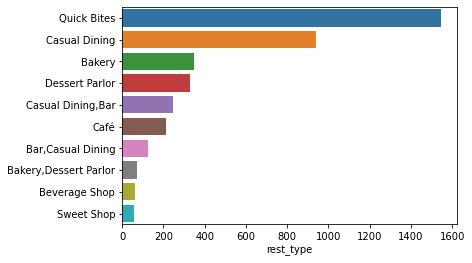

In [18]:
sns.barplot(rest_type_values,rest_type_values.index)

<AxesSubplot:xlabel='cuisine'>

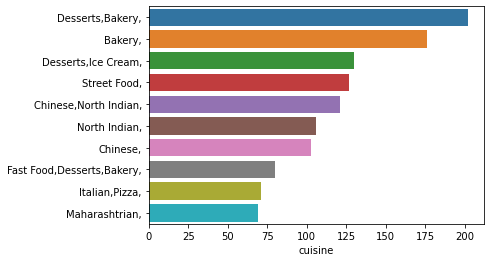

In [19]:
sns.barplot(cuisine_values,cuisine_values.index)

In [20]:
total_locations=df['loc'].value_counts()[:10]
print(total_locations)

Kothrud            273
Viman Nagar        241
Wakad              235
Baner              234
Hinjawadi          225
Hadapsar           196
Kharadi            194
Sinhgad Road       147
Pimple Saudagar    141
Koregaon Park      130
Name: loc, dtype: int64


<AxesSubplot:xlabel='loc'>

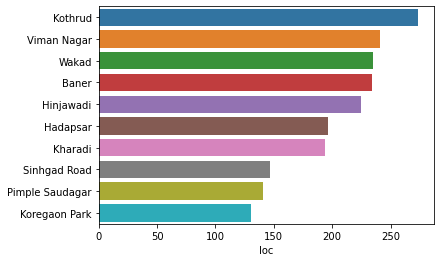

In [21]:
sns.barplot(total_locations,total_locations.index)

(array([ 604.,    0.,    0.,    0.,   63.,  405., 1006., 1893., 1291.,
         171.]),
 array([0.  , 0.49, 0.98, 1.47, 1.96, 2.45, 2.94, 3.43, 3.92, 4.41, 4.9 ]),
 <BarContainer object of 10 artists>)

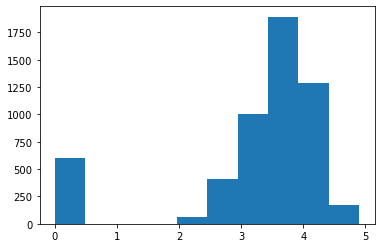

In [22]:
df['dine_rating']
plt.hist(df['dine_rating'])

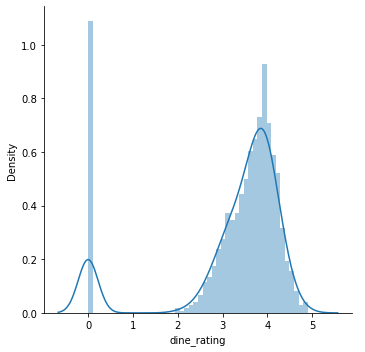

In [23]:
sns.FacetGrid(df, size=5).map(sns.distplot, "dine_rating",kde="True").add_legend()  #distribution plot
plt.show()

In [24]:
#How many restaurants have rating more than 4
top_10_ratings=df[df['dine_rating']>4.0]
print(len(top_10_ratings['loc']))
#give us the count of these restaurants by location

#high_Rating_Resta_locations=top_10_ratings['loc'].value_counts()[:10]


1070


In [25]:
total_locations=df['loc'].value_counts()[:10]
total_locations

places=total_locations.index
print(places)

Index(['Kothrud', 'Viman Nagar', 'Wakad', 'Baner', 'Hinjawadi', 'Hadapsar',
       'Kharadi', 'Sinhgad Road', 'Pimple Saudagar', 'Koregaon Park'],
      dtype='object')


In [26]:
df.duplicated().sum()

250

In [27]:
df=df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

(-1.106390864913637,
 1.1003043269006494,
 -1.1031880560866696,
 1.1037417655017339)

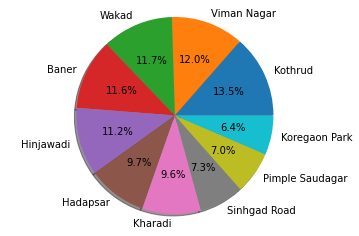

In [29]:
labels=places
sizes=total_locations.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.axis('equal')

In [30]:
df['cuisine']

0       North Indian,Continental,Asian,Finger Food,
1                             North Indian,Mughlai,
2                 Mediterranean,Asian,North Indian,
3                      Asian,European,North Indian,
4                          Finger Food,Continental,
                           ...                     
5428             South Indian,Chinese,North Indian,
5429                               Mughlai,Iranian,
5430                Chinese,Fast Food,North Indian,
5431       Beverages,Chinese,Street Food,Fast Food,
5432                                  Thai,Chinese,
Name: cuisine, Length: 5183, dtype: object

In [31]:
df['cuisine'].unique()[:5]

array(['North Indian,Continental,Asian,Finger Food,',
       'North Indian,Mughlai,', 'Mediterranean,Asian,North Indian,',
       'Asian,European,North Indian,', 'Finger Food,Continental,'],
      dtype=object)

In [32]:
#Number of Cuisines in Pune
cuisine=[]
for i in df['cuisine']:
    for j in i.split(","):
        if j not in cuisine:
            cuisine.append(j)
print(cuisine)
print(len(cuisine))

#So there are 92 total no. of Cuisine in all the restaurant in Pune.

['North Indian', 'Continental', 'Asian', 'Finger Food', '', 'Mughlai', 'Mediterranean', 'European', 'Salad', 'Malaysian', 'Vietnamese', 'Thai', 'Chinese', 'Japanese', 'Biryani', 'Kebab', 'Italian', 'Bar Food', 'Seafood', 'Fast Food', 'Healthy Food', 'Mexican', 'Desserts', 'American', 'Greek', 'Maharashtrian', 'Beverages', 'South American', 'Steak', 'Brazilian', 'Malwani', 'South Indian', 'Chettinad', 'Kerala', 'Mangalorean', 'Pizza', 'Iranian', 'Goan', 'Charcoal Chicken', 'Cafe', 'Modern Indian', 'Korean', 'Sushi', 'Cantonese', 'Momos', 'Bakery', 'Tea', 'BBQ', 'Mongolian', 'Tex-Mex', 'Lebanese', 'Street Food', 'Cuisine Varies', 'Sandwich', 'Middle Eastern', 'African', 'Ethiopian', 'Burger', 'Hyderabadi', 'Parsi', 'German', 'Konkan', 'Rolls', 'Singaporean', 'Indonesian', 'Rajasthani', 'Lucknowi', 'Burmese', 'Bengali', 'Ice Cream', 'Kashmiri', 'Arabian', 'Gujarati', 'French', 'Tibetan', 'Coffee', 'Mithai', 'Bihari', 'Wraps', 'Odia', 'Juices', 'Raw Meats', 'Turkish', 'Frozen Yogurt', 'Awa

In [33]:
#Number of restaurants having cuisine North India
a=[]
b=[]
for i in df['cuisine']:
    a=i.split(',')
    b.append(a)
    
count=0
for i in b:
    for j in i:
        if j=="North Indian":
            count=count+1
print(count)
#So we have 2057 North Indian Restaurant in Pune.

2057


In [34]:
#Number of Biryani cuisines in pune
count=0
for i in df['cuisine']:
    for j in i.split(","):
        if j=='Biryani':
            count=count+1  
print(count)


566


In [35]:
df['delivery_rating'].isnull().sum()

2774

In [36]:
df['delivery_rating'].dropna(inplace=True)

In [37]:
df['delivery_rating']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5428    3.5
5429    NaN
5430    NaN
5431    3.1
5432    3.8
Name: delivery_rating, Length: 5183, dtype: float64

(array([  2.,   0.,  19.,  74., 146., 377., 938., 641., 190.,  22.]),
 array([2.  , 2.28, 2.56, 2.84, 3.12, 3.4 , 3.68, 3.96, 4.24, 4.52, 4.8 ]),
 <BarContainer object of 10 artists>)

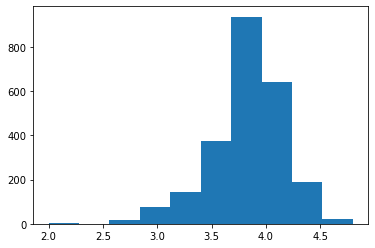

In [38]:
plt.hist(df['delivery_rating'])

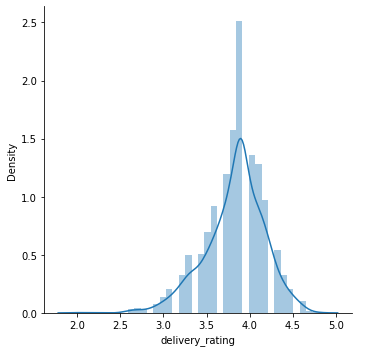

In [39]:
sns.FacetGrid(df, size=5).map(sns.distplot, "delivery_rating").add_legend() #distribution plot
plt.show()

<AxesSubplot:xlabel='delivery_rating'>

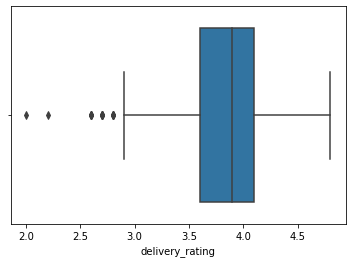

In [40]:
sns.boxplot(df["delivery_rating"]) #percentile

<AxesSubplot:xlabel='dine_rating'>

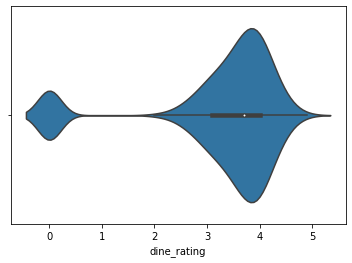

In [41]:
sns.violinplot(df['dine_rating'])

<AxesSubplot:xlabel='Cost (RS)'>

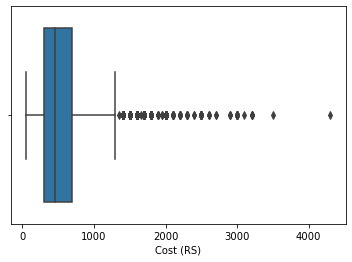

In [42]:
sns.boxplot(df['Cost (RS)'])  #Average of 2 people

<AxesSubplot:xlabel='Cost (RS)'>

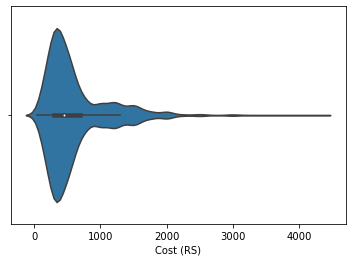

In [43]:
sns.violinplot(df['Cost (RS)'])

(array([2.717e+03, 1.404e+03, 5.750e+02, 3.060e+02, 1.200e+02, 3.400e+01,
        2.000e+01, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([  50.,  475.,  900., 1325., 1750., 2175., 2600., 3025., 3450.,
        3875., 4300.]),
 <BarContainer object of 10 artists>)

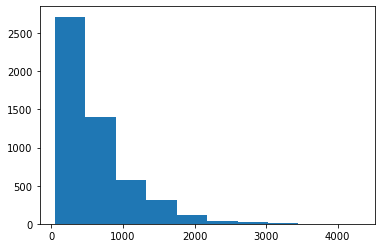

In [44]:
plt.hist(df['Cost (RS)'])

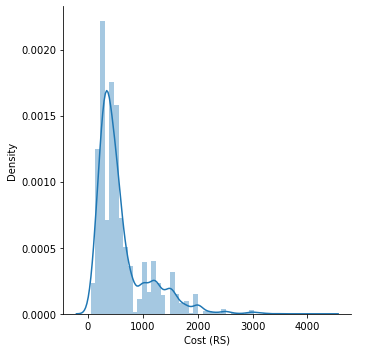

In [45]:
sns.FacetGrid(df, size=5).map(sns.distplot, "Cost (RS)").add_legend() #distribution plot
plt.show()

In [46]:
rating_bw=df[(df['dine_rating']>4.8) & (df['dine_rating']<=5)]
rating_bw

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,Cost (RS),cost,liked
49,Savya Rasa\r\r\n ...,"Fine Dining,Bar",Koregaon Park,4.9,"-1,245",4.1,-223,"Chettinad,Kerala,Mangalorean,South Indian,",2100,Rs. 2100,"Appam, Neer Dosa, Cocktails, Fish, Vegetable S..."
137,Gong\r\r\n,Casual Dining,"Balewadi High Street, Baner",4.9,"-1,727",4.4,-602,"Sushi,Thai,Asian,",1700,Rs. 1700,"Dumplings, Chocolate Dome, Cocktails, Ramen, K..."
382,Santè Spa Cuisine\r\r\n ...,Casual Dining,Koregaon Park,4.9,"-1,396",3.9,-89,"Pizza,Mediterranean,Healthy Food,Continental,S...",1300,Rs. 1300,"Salad, Farm Pizza, Healthy Veg Food, Spinach H..."
652,Le Plaisir\r\r\n ...,Café,Deccan Gymkhana,4.9,"-4,766",4.4,"-2,672","Cafe,Continental,Italian,European,",1000,Rs. 1000,"Pasta, Sandwich, Macaroon, Cheesecake, Salad, ..."
778,Le Plaisir\r\n ...,Café,Deccan Gymkhana,4.9,"-4,766",4.4,"-2,670","Cafe,Continental,Italian,European,",1000,Rs. 1000,"Pasta, Sandwich, Macaroon, Cheesecake, Salad, ..."
1044,The French Window Patisserie\r\n ...,"Café,Dessert Parlor",Koregaon Park,4.9,"-1,581",4.5,-430,"European,Bakery,French,Desserts,Cafe,",600,Rs. 600,"Coffee, Hot Chocolate, Tiramisu, Sandwich, Che..."
1381,Gong\r\n,Casual Dining,"Balewadi High Street, Baner",4.9,"-1,727",4.4,-602,"Sushi,Thai,Asian,",1700,Rs. 1700,"Dumplings, Chocolate Dome, Cocktails, Ramen, K..."
2099,Santè Spa Cuisine\r\n ...,Casual Dining,Koregaon Park,4.9,"-1,396",3.9,-89,"Pizza,Mediterranean,Healthy Food,Continental,S...",1300,Rs. 1300,"Salad, Farm Pizza, Healthy Veg Food, Spinach H..."
2134,Le Flamington\r\n ...,"Café,Bakery",Kalyani Nagar,4.9,(614 Reviews),NaN,NaN,"European,Bakery,",600,Rs. 600,"Coffee, Sandwich, Hot Chocolate, Cappuccino, C..."
4683,Savya Rasa\r\n ...,"Fine Dining,Bar",Koregaon Park,4.9,"-1,245",4.1,-223,"Chettinad,Kerala,Mangalorean,South Indian,",2100,Rs. 2100,"Appam, Neer Dosa, Cocktails, Fish, Vegetable S..."
